## Import Libraries

In [423]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


%matplotlib inline


## Load the Data

In [424]:
df = pd.read_csv("cleaned.csv")

In [425]:
df.shape

(5745, 19)

In [426]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


## Preprocess the Data

#### Split the data into categorical and numerical

In [427]:
numeric_features = ['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value']
categorical_features = ['team', 'position']

In [428]:
for i in categorical_features: # checking outliers in categorical features
    print(df[i].value_counts())

team
FC Volendam                         30
1.FC Köln                           28
Orlando Pirates                     27
Kasimpasa                           27
FC Utrecht                          26
                                    ..
América Futebol Clube (MG)           2
Grêmio Foot-Ball Porto Alegrense     2
Coritiba Foot Ball Club              2
CA Huracán                           1
Goiás Esporte Clube                  1
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1006
midfield-CentralMidfield       666
Attack Centre-Forward          644
Goalkeeper                     558
Defender Right-Back            522
midfield-DefensiveMidfield     479
Defender Left-Back             473
Attack-RightWinger             430
midfield-AttackingMidfield     420
Attack-LeftWinger              389
midfield-RightMidfield          57
midfield-LeftMidfield           49
Attack-SecondStriker            37
midfield                         6
Defender                    

In [429]:
df.shape

(5745, 19)

In [430]:
# Counts each value in team
type_counts = df['team'].value_counts()

# removes each value that is under 2
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [431]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [432]:
df.shape

(5743, 19)

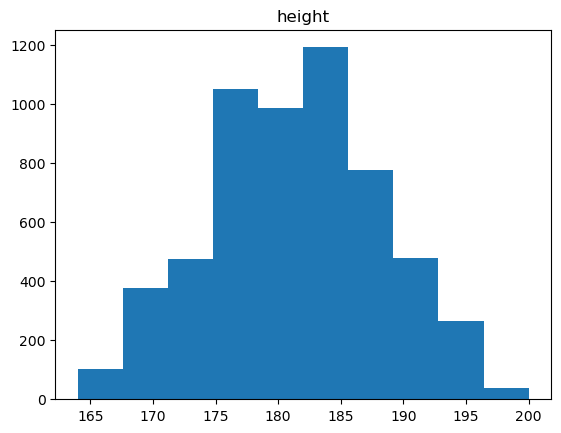

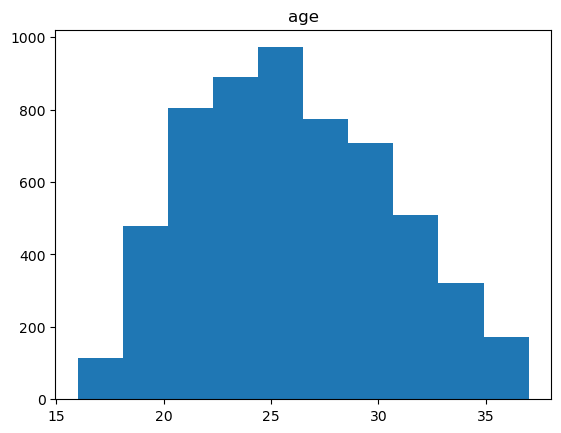

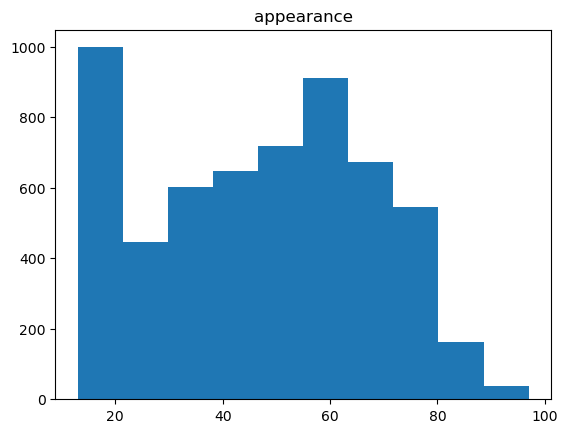

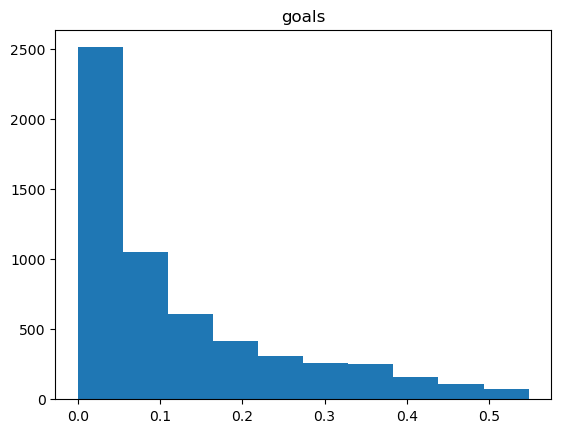

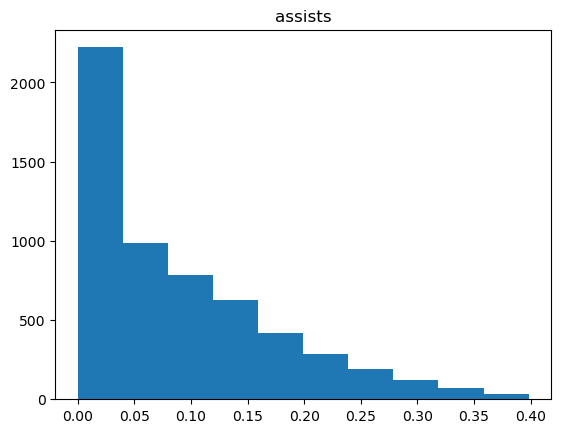

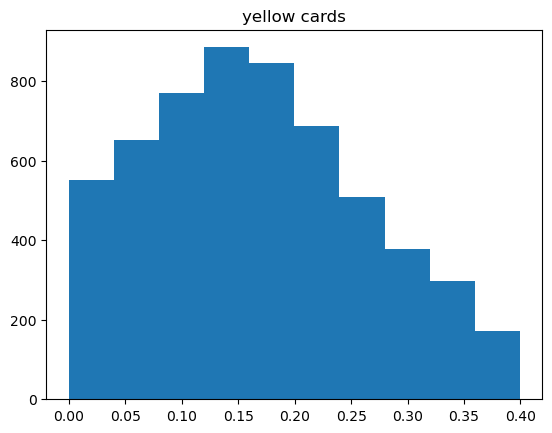

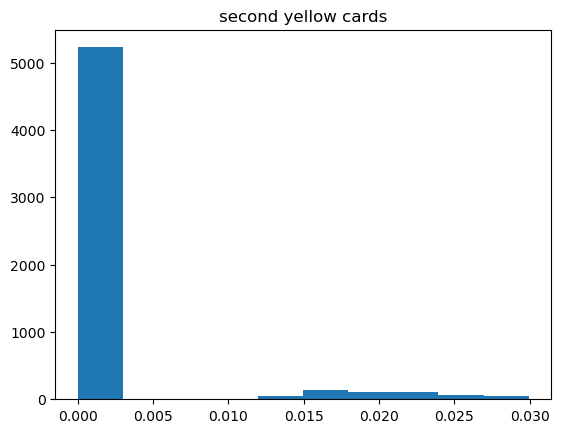

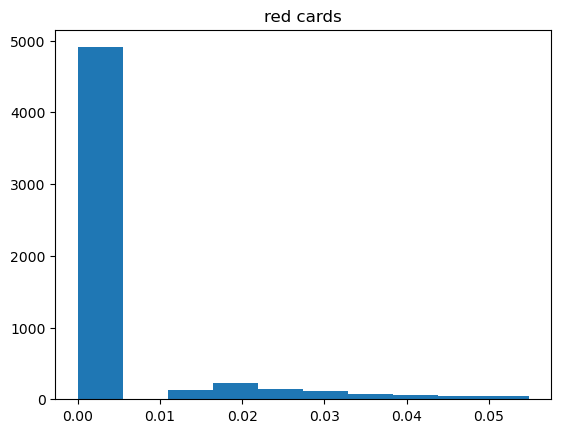

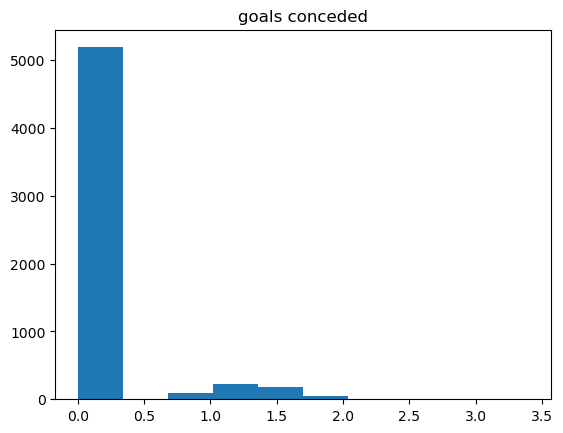

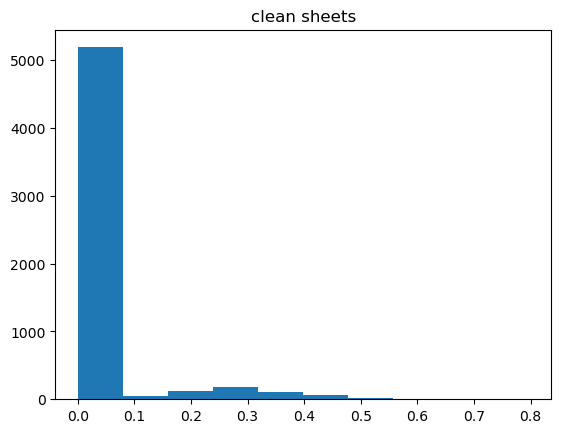

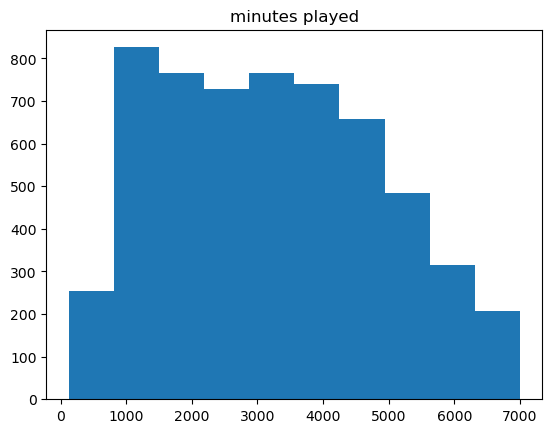

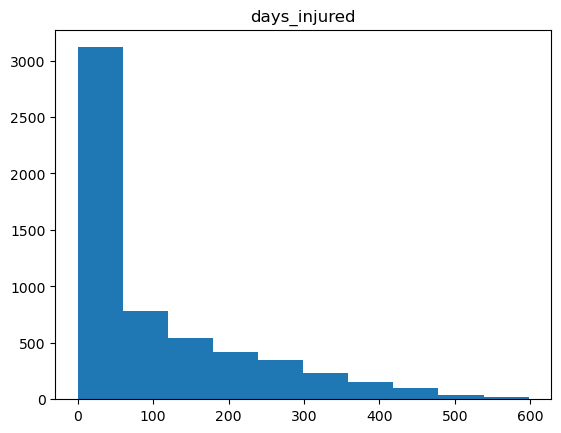

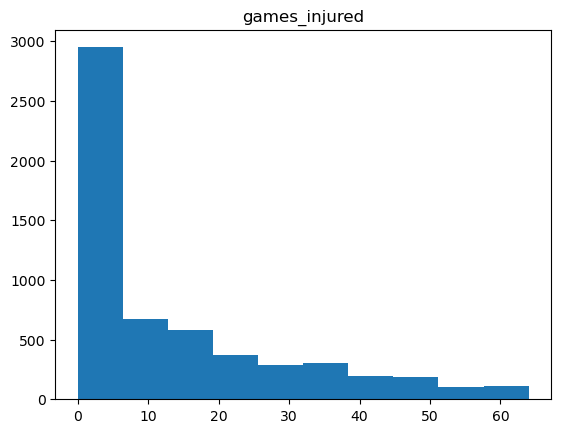

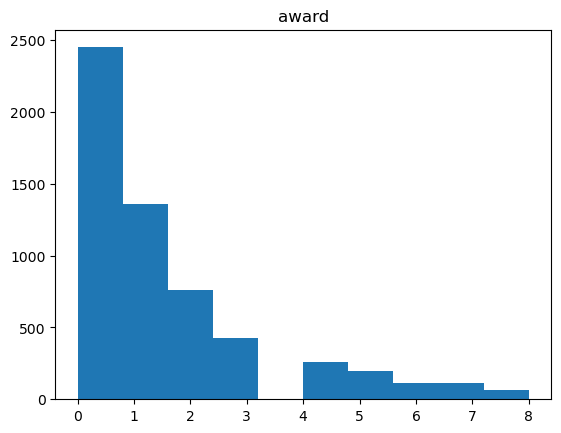

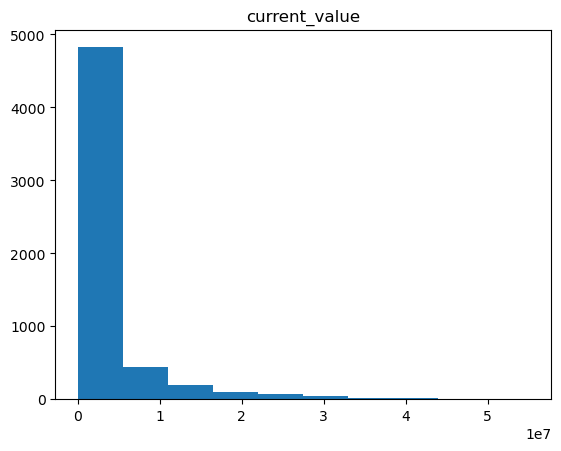

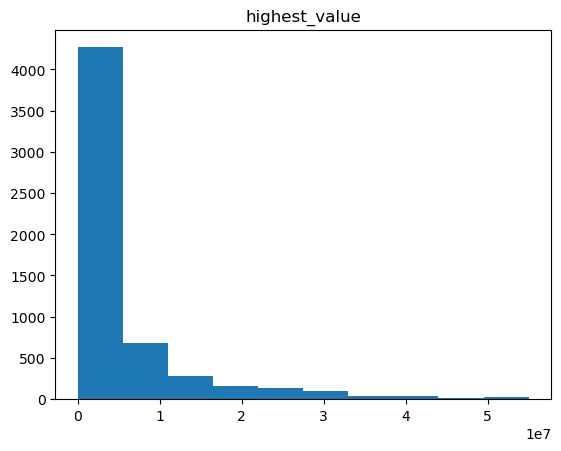

In [433]:
for i in numeric_features: # histogram for each numerical feature 
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [434]:
categorical_features


['team', 'position']

In [435]:
df.drop("Unnamed: 0", inplace=True, axis=1) # removes the column unnamed



In [436]:
df.head() # here we can see that it is removed

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000
2,Manchester United,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.000000,0.000000,0.000000,2686,175,28,1,10000000,12000000
3,Manchester United,Defender Right-Back,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,0.000000,0.000000,0.000000,5574,328,49,3,35000000,35000000
4,Manchester United,Defender Right-Back,183.0,25.0,60,0.000000,0.018817,0.094083,0.0,0.018817,0.000000,0.000000,4783,126,20,1,22000000,40000000


In [437]:
df.head(2)


,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [438]:
df = pd.get_dummies(df, columns=categorical_features) # here we made dummies for each categorical features

In [439]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, classification_report, f1_score


# model = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')


In [440]:
X = df[['current_value', 'goals']]


scaler = StandardScaler()
scaler = scaler.fit_transform(X)
scaler.shape


(5743, 2)

In [441]:
min_points = 3

nn = NearestNeighbors(n_neighbors=min_points)
nn.fit(scaler)
distances, indices = nn.kneighbors(scaler)


In [442]:
distances[:,min_points-1]

array([0.        , 0.        , 0.        , ..., 0.01735164, 0.02406146,
       0.        ])

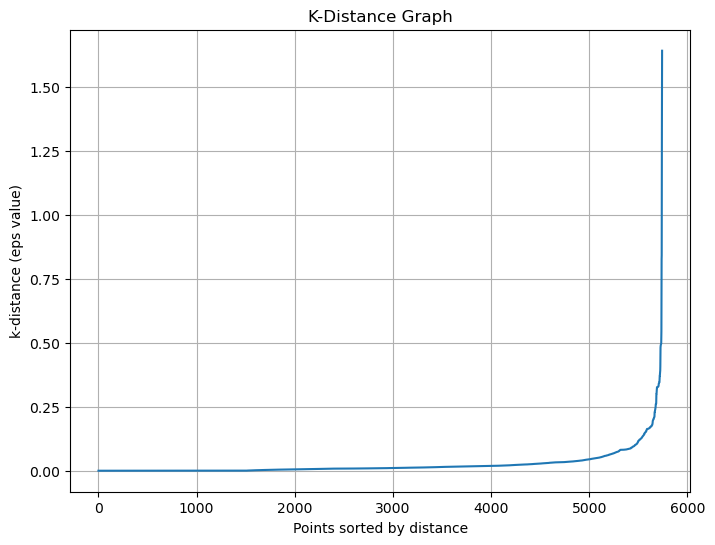

In [443]:
k_dist = distances[:, min_points-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()


In [444]:
chosen_eps = 0.4  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_points)


In [445]:
clusters = dbscan.fit_predict(scaler)


In [446]:
pd.Series(clusters).value_counts()

 0    5685
-1      18
 2      18
 1      16
 3       6
Name: count, dtype: int64

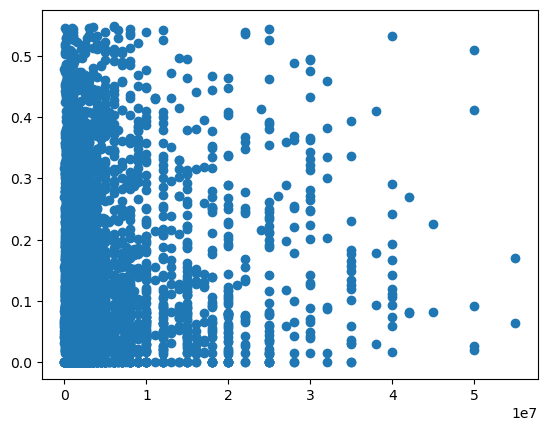

In [447]:
plt.scatter(x=df['current_value'] , y=df['goals'])
plt.show()

In [448]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg


0.8036732897238206

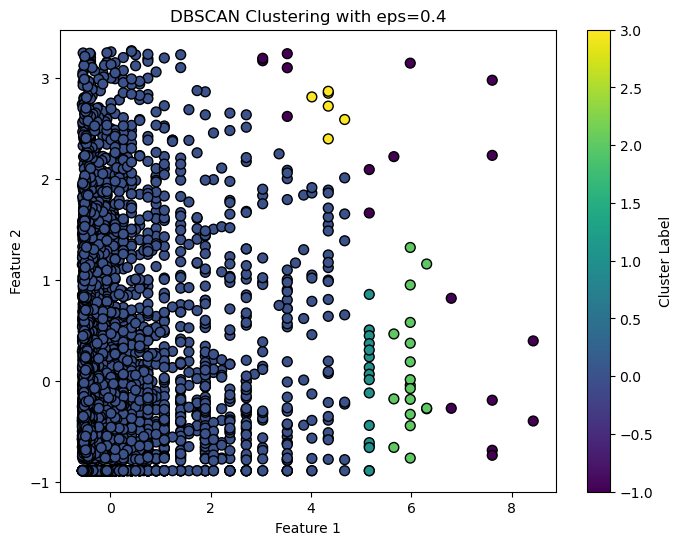

In [449]:
plt.figure(figsize=(8, 6))
plt.scatter(scaler[:, 0], scaler[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [450]:
X['dbscan'] = clusters


In [451]:
X['dbscan'].value_counts()


dbscan
 0    5685
-1      18
 2      18
 1      16
 3       6
Name: count, dtype: int64

<Axes: xlabel='current_value', ylabel='goals'>

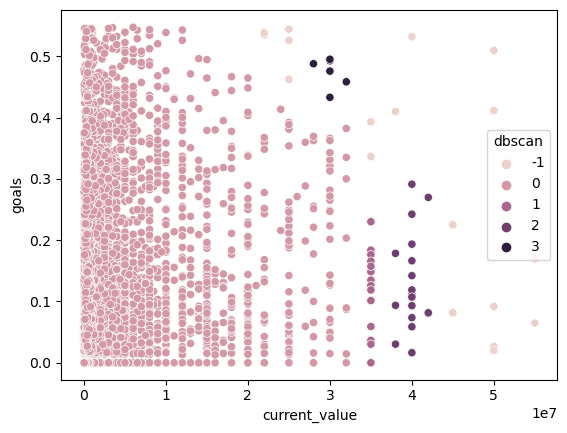

In [452]:
sns.scatterplot(data = X , x = 'current_value', y = 'goals', hue = 'dbscan')
